This notebook is a basic check that the basis transformation we're proposing will work in practice over a wide range of possible cells. The approach is going to be to enumerate all supercells of a simple cubic lattice up to some determinant so that all possible niggli cells are hit. Then ensure that all the possible grids for those cells are symmetry preserving after the transformation up to a certain k-point density.

In [1]:
import numpy as np
from phenum.HNFs import get_HNFs
from opf_python.basis_check import cell_test
vf = 10
kpd = 100
count = {}
for i in range(1,45):
    count[str(i)] = 0

In [2]:
As = [[[2,0,0],[0,2,0],[0.5,0,2]],
      [[1,1,1],[1.61803,-0.618034,-1],
       [-0.668912,1.96676,-1.29785]],
      [[1,1,1],[1.22474487,-1.22474487,-1],
       [-0.16598509,-1.64308297,1.80906806]],
      [[0,0.5,0.5],[0.5,0.5,0],[0.5,0,0.5]],
      [[1,0,0],[0,1,0],[1,0,1]],
      [[-1,1,1],[1,1,-1],[1,-1,1]],
      [[1, 0, 0],[0.5, -0.8660254037844386, 0],
       [0, 0, 2]],
      [[0, 0, -0.5],[1, 0, 0],
       [-0.5, 0.8660254, -0.5]],
      [[-1, 0, -1],[0, -1.32288, -0.5],
       [-2.11652, -0.610985, -0.383485]],
      [[-1, 0, -1],[0, -1.32288, 0.5],
       [-1.548584, 0.774292, 0.04858]],
      [[-1, 0, -1],[1.51184, 0, -0.845178],
       [-1.255922, -1.44338, -0.07741]],
      [[1,2,2],[2,1,2],[2,2,1]],
      [[1, 0, 0],[0, 1, 0],[1, 0, 2]],
      [[0, 0, 0.5],[1, 0, 0],[0, 1, 0.5]],
      [[2,0,0],[0,2,0],[-1,-1,2]],
      [[-1.95095, 1.41625, -0.433603],
       [1, -1, -2],[0, 2.60788, 0.44606]],
      [[-1, 1, 2],[1, 1.60788, -1.55394],
       [0.80278, -0.47253, 2.762655]],
      [[0, 0, 2],[1, -2, 1],[-2, -1,3]],
      [[1, 0, 0],[0, 2, 0],[1, 0, 3]],
      [[0.5, 1, 0],[0.5, -1, 0],[0.5, 1, 3]],
      [[1, 1, 1],[1, -1, -1],
       [1, -0.73205, 2.73205]],
      [[-0.3333333, -1.54116, 1.87449],
       [1, 1, 1],[1.6666667, -2.54116, 0.87449]],
      [[1, 1, 1],[1.61803, -0.618034, -1],
       [-0.05557, 2.99895, 0.056624]],
      [[1, 1, 1],[1.41421, -1.41421, 0],
       [-0.43541, -0.43541, 2.37083]],
      [[0.5, 1, 1.5],[0, 2, 0],[0.5, 1, 4.5]],
      [[1.41144, 0.0885622, -2],
       [-0.99868, 2.21232, 1.268178],
       [4.82156, -1.0351956, -3.268178]],
      [[-1.53633, 1.36706, -1.33073],
       [1, 1, 1],[0.0817, 0.74903, -2.33073]],
      [[0, 1, 1.5],[0.5, 0, 1.5],[0, 1, 4.5]],
      [[1, 1, -1],[-1.779796, 0.1798, 0],
       [1.735376, -0.61953, -2.68415]],
      [[2, 0, 0],[0, 2, 0],[2.5, 0, 2]],
      [[1, 1, 1],[1.61803, -0.618034, -1],
       [0.331088, 2.96676, -0.29785]],
      [[1, 1, 1],[1.22474487, -1.22474487, -1],
       [0.83401491, -0.64308297, 2.80906806]],
      [[1, 1, 0],[0, 2, 0],[1.5, 1, 2]],
      [[-1.46391, 0, 1.96391],[1, 1, 1],
       [-1.46391, 2, 1.96391]],
      [[-0.05387, -0.61088, 2.51474],[1, 1, 1],
       [1.755698, -0.77045, 2.51474]],
      [[1, 1, 1],[1.70119, -1.45119, 1],
       [1.69779, -0.4322505, 4.23446]],
      [[1, 1, 1],[1.45119, -1.70119, -1],
       [1.28878, -2.26895, 1.48018]],
      [[0.464824, -1.464824, -1.907413],
       [-1.618033, 0.618033, -1],
       [-0.535176, -2.464824, -1.907413]],
      [[-1.44896, 0.948958, -1],[-1, -1, 0],
       [-1.106536, -0.393466, -3.02006]],
      [[-0.666125, 1.16613, 2.04852],[1, 1, 0],
       [0.951905, 0.548096, 3.04852]],
      [[1, 1, 0],[1.61803, -0.618034, 1],
       [0.9638627, 1.536137, 2.38982]],
      [[-1, 0, -1],[1.85397, 0.854143, -1.35397],
       [-2, 1.41421, 0]],
      [[-1.79092, -1.47209, 0.790922],
       [1, 0, 1],[-0.79092, -2.8863, -0.209078]],
      [[0, 1.73205, 1],[-1, 0, -1],
       [1.66542, 2.404907, -0.66542]],
      [[-0.39716, -0.34718, 2.49434],
       [2.64194, -0.14194, 0],
       [-1.79432, -1.69436, 3.98868]]]
As = [np.transpose(i) for i in As]

In [3]:
t = 0
for U in As:
    print(t)
    if t not in [70]:
        worked, count = cell_test(U,count,max_kpd_=kpd)
        if not worked:
            print("failed on basis: ",np.transpose(U))
            break
    t += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


In [4]:
from opf_python.niggli_lat_id import niggli_id
At = np.dot(B.niggli,[[1,0,0],[0,1,0],[1,77,78]])
niggli_id(At,eps_=1E-4)

NameError: name 'B' is not defined

In [6]:
niggli_id(np.transpose([[ -7.89509500e+01,  -1.22390510e+02,   1.19219777e+02],
       [ -2.18713936e-14,  -2.60788000e+00,  -4.46060000e-01],
       [  7.80000000e+01,   1.28022520e+02,  -1.20761260e+02]]),eps_=1E-2)

('simple tetragonal', 11, 4, array([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 2]]))

In [4]:
from opf_python.pyniggli import reduced_cell
B = reduced_cell(As[15],path_=True)
np.transpose(B.niggli)

35144


array([[ 1.      , -1.      , -2.      ],
       [-1.95095 ,  1.41625 , -0.433603],
       [-1.      , -1.60788 ,  1.55394 ]])

In [5]:
from niggli import niggli_reduce
np.transpose(niggli_reduce(As[15]))

array([[-1.95095 ,  1.41625 , -0.433603],
       [ 1.      , -1.      , -2.      ],
       [ 1.95095 ,  1.19163 ,  0.879663]])

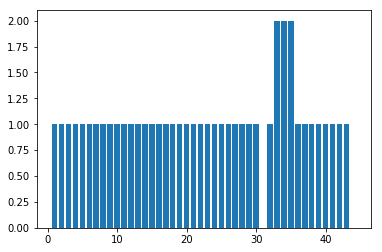

In [4]:
import matplotlib.pyplot as plt
kys = [int(i) for i in count.keys()]
plt.bar(kys, count.values())
plt.show()

In [5]:
for k in count.keys():
    if count[k] == 0:
        print(k)

44
31


In [5]:
len(As)

45